In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("output/Walker_Basic_Info_Table.csv")
cohortC_data = pd.read_csv("output/Walker_Basic_Cohort_Table_counts.csv")
walks = pd.read_csv("data/walks.csv")

In [3]:
zero_walker = 0
one_walker = 0
for i in data["totalWalks"]:
    if(pd.isnull(i)):
        zero_walker += 1
    else:
        one_walker += 1

In [4]:
data = data[data["totalWalks"] != 0.0]
data.reset_index(inplace=True, drop=True)
data = data.sort_values(by="totalWalks", ascending=False)

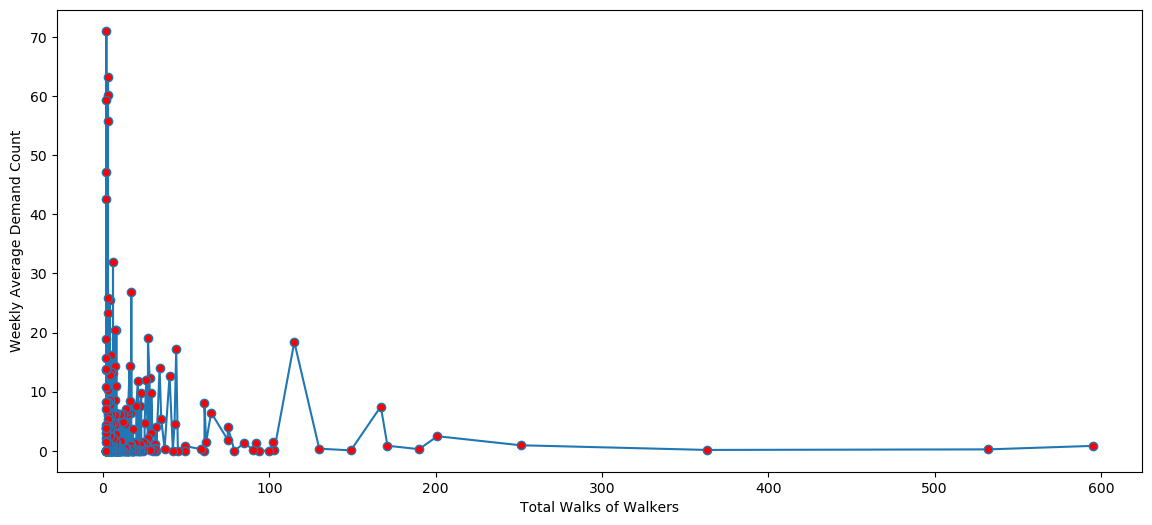

In [5]:
x = data["totalWalks"].to_list()
y = data["weeklyAverageDemandCount"].to_list()

filtered_x = list()
filtered_y = list()
for i in range(len(y)):
    if y[i] <= 100:
        filtered_x.append(x[i])
        filtered_y.append(y[i])


plt.figure(figsize=(14, 6))
plt.plot(filtered_x, filtered_y, marker="o", markerfacecolor="red")
plt.xlabel("Total Walks of Walkers")
plt.ylabel("Weekly Average Demand Count")
plt.show()

From this graph, we can understand that users who have just started using the application have questions about the application, and this decreases as they use and experience.

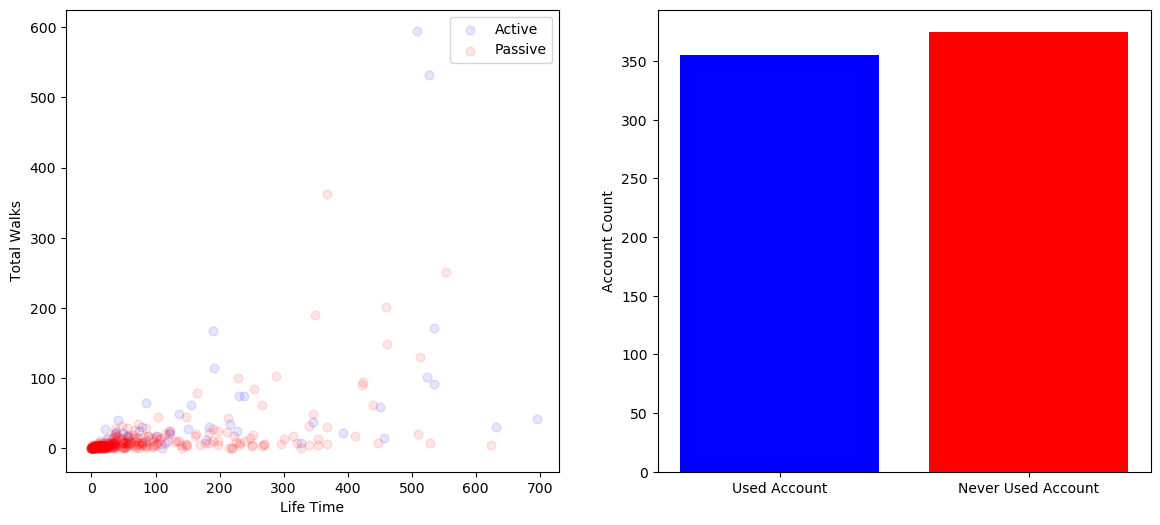

In [6]:
x = data["lifetime"].to_list()
y = data["totalWalks"].to_list()
filter = data["activityTag"].to_list()

filtered_x1 = list()
filtered_y1 = list()
filtered_x2 = list()
filtered_y2 = list()

for i in range(len(x)):
    if(filter[i] == "Active"):
        filtered_x1.append(x[i])
        filtered_y1.append(y[i])
    else:
        filtered_x2.append(x[i])
        filtered_y2.append(y[i])

keys = ["Used Account", "Never Used Account"]
values = [one_walker, zero_walker]
colors = ["blue", "red"]

plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
plt.scatter(filtered_x1, filtered_y1, color="blue", alpha=0.1, s=40, label="Active")
plt.scatter(filtered_x2, filtered_y2, color="red", alpha=0.1, s=40, label="Passive")
plt.xlabel("Life Time")
plt.ylabel("Total Walks")
plt.legend()

plt.subplot(1,2,2)
plt.ylabel("Account Count")
plt.bar(keys, values, color=colors)


plt.show()

From first graph, we can assume that most of the people who use the app tend to quit within 100 days. Additionally, as can be seen in the second graph, more than half of the registered users do not walk at all. This may be due to the initial difficulty of use we noted in the previous chart.

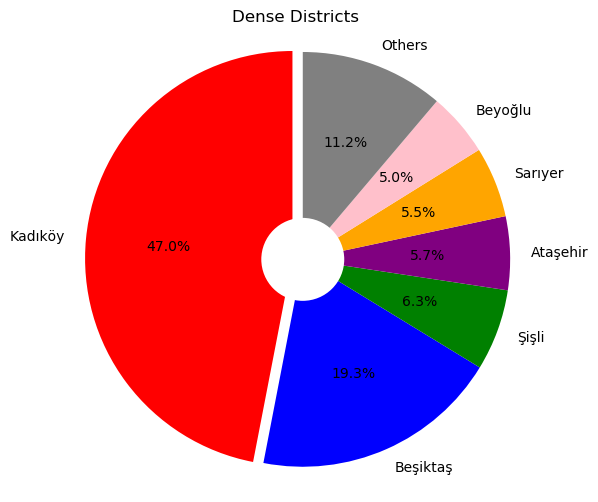

In [7]:
district = pd.DataFrame(walks["district"].value_counts()).reset_index()

names = district["index"].to_list()
datas = district["district"].to_list()
filtered_names = list()
filtered_datas = list()
colors = ['red','blue','green','purple', 'orange', "pink", "gray"]

others = 0
isOtherExist = False
for i in range(len(datas)):
    if(datas[i] > sum(datas)/len(datas)):
        filtered_names.append(names[i])
        filtered_datas.append(datas[i])
    else:
        others += datas[i]
        isOtherExist = True

if(isOtherExist):
    filtered_names.append("Others")
    filtered_datas.append(others)


plt.figure(figsize=(7, 6))

plt.pie(filtered_datas, labels=filtered_names, colors=colors, startangle=90, autopct ='%1.1f%%', explode =(0.05,0,0,0,0,0,0))
centre_circle = plt.Circle((0, 0), 0.20, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Dense Districts")
plt.axis('equal')
plt.show()

As can be seen from the pie chart, the places where the application is used most intensively are Kadıköy and Beşiktaş. Based on this information, breakthroughs can be made to facilitate use in dense areas, or investments can be made to increase the popularity of the application in less used areas.

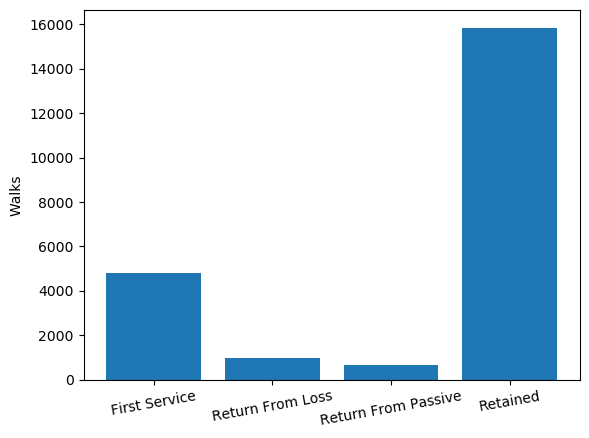

In [8]:
first = sum(cohortC_data["firstService"].to_list())
loss = sum(cohortC_data["returnFromLoss"].to_list())
passive = sum(cohortC_data["returnFromPassive"].to_list())
retained = sum(cohortC_data["retained"].to_list())

categories = ["First Service", "Return From Loss", "Return From Passive", "Retained"]
datas = [first, loss, passive, retained]

plt.bar(categories, datas)
plt.ylabel("Walks")

plt.xticks(rotation=10)
plt.show()

As can be seen in the table, the return percentage of people who stop using the application is very low. However, it seems to be a successful application in terms of first month usage and user continuity.